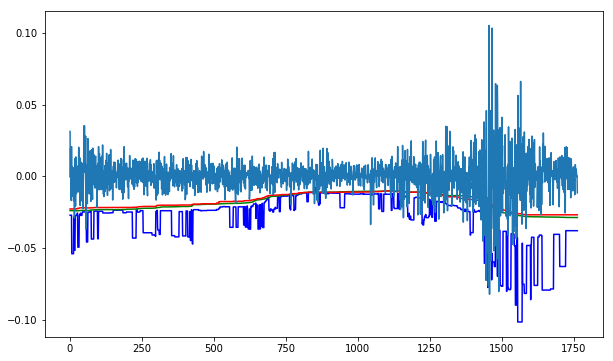

In [8]:
#This program estimates VaR using Extreme Value Theory and Generalized Pareto Distribution
#Author: Daniel Traian Pele
#Date: March, 2019

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto as gpd
from scipy.stats import norm
# We will look at stock prices overtime
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2009,12,31)
#end = datetime.date.today()

from pandas_datareader import data as wb  

ticker = '^DJI' 
df = pd.DataFrame()
df[ticker] = wb.DataReader(ticker, data_source='yahoo', start=start, end=end)['Close']
log_returns = np.log(1 + df.pct_change()).dropna()

# w=window length (trading days)
#alpha = the significance level
w=750
alpha=0.05

VaR_empiric=[]
VaR_normal=[]
VaR_GPD=[]


def Rolling_VaR(w):
    last=len(log_returns)-w
    for i in range(1,last):
        ret=log_returns[i:(w+i-1)]
        q=ret.quantile(0.1)
        u=-q
        x=ret[ret<-u]
        y=(x.abs()-u).dropna()
        #y=x.abs().dropna()
        y=y[y>0]
        y=np.array(y)
        fit = gpd.fit(y)
        gpd_u=gpd.cdf(u,*fit)

        csi, mu, beta=gpd.fit(y)

        v_GPD=-(u+beta/csi*((alpha/(1-gpd_u))**(-csi)-1))
        VaR_GPD.append(v_GPD)
        #rt=log_returns[w+i+1]
        mu=ret.mean()
        sigma=ret.std()
        v_normal=norm.ppf(alpha, mu, sigma)
        VaR_normal.append(v_normal)
        v_empiric=ret.quantile(alpha)
        VaR_empiric.append(v_empiric)
        #log_return.append(rt)

Rolling_VaR(w)

t = np.linspace(1,np.size(VaR_GPD),np.size(VaR_GPD))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, VaR_GPD,c='b')
plt.plot(t, VaR_normal,c='g')
plt.plot(t, VaR_empiric,c='r')
ret=log_returns[(w+1):len(log_returns)]
plt.plot(t, ret)
plt.show()



